In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal as mv_norm

In [2]:
m1, s1 = -3, 1
m2, s2 = 4, 2

x1 = np.linspace(-3, 3, 1000+1)
x2 = np.linspace(-5, 8, 1000+1)

x_prod = np.linspace(-8, 10, 1000+1)

num_samples = 10000
num_bins = int(np.sqrt(num_samples))

#plot one
norm1_pdf = norm.pdf(x_prod, m1, s1)
norm2_pdf = norm.pdf(x_prod, m2, s2)
norm1_samples = norm.rvs(m1, s1, size=num_samples)
norm2_samples = norm.rvs(m2, s2, size=num_samples)
norm1_samples_many = norm.rvs(m1, s1, size=num_samples*100)
norm2_samples_many = norm.rvs(m2, s2, size=num_samples*100)

#plot two
norm_prod_samples = norm1_samples * norm2_samples


#plot three: product of pdfs
norm_pdf_prod = np.array([norm.pdf(x_, m1, s1) * norm.pdf(x_, m2, s2) for x_ in x_prod])


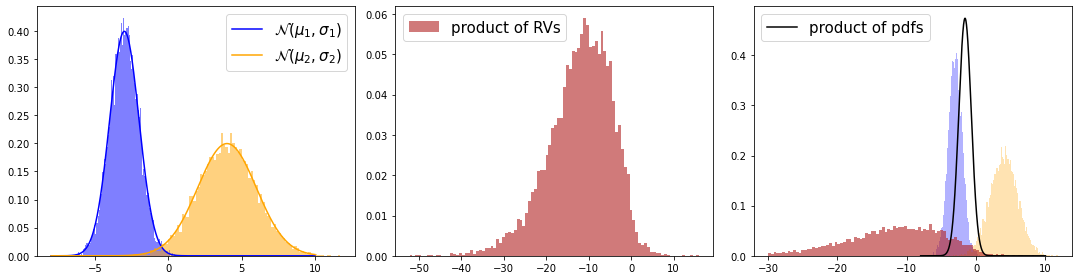

In [3]:
#plot sum of RV vs pdf

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('axes', labelsize=13)
legend_size=15

ax[0].plot(x_prod, norm1_pdf, color='blue', label='$\mathcal{N}(\mu_1, \sigma_1)$')
ax[0].plot(x_prod, norm2_pdf, color='orange', label='$\mathcal{N}(\mu_2, \sigma_2)$')
ax[0].hist(norm1_samples, bins=num_bins, color='blue', alpha=0.5, density=True)
ax[0].hist(norm2_samples, bins=num_bins, color='orange', alpha=0.5, density=True)
ax[0].legend(loc='upper right', prop={'size': legend_size})


#ax[1].plot(x_sum, norm_sum_pdf, color='firebrick')
ax[1].hist(norm_prod_samples, bins=num_bins, color='firebrick', alpha=0.6, density=True, label='product of RVs')
ax[1].legend(loc='upper left', prop={'size': legend_size})

ax[2].plot(x_prod, norm_pdf_prod*800, color='black', label='product of pdfs')
ax[2].hist(norm1_samples, bins=num_bins, color='blue', alpha=0.3, density=True)
ax[2].hist(norm2_samples, bins=num_bins, color='orange', alpha=0.3, density=True)
ax[2].hist(norm_prod_samples, bins=num_bins, range=[-30,10], color='firebrick', alpha=0.6, density=True)
ax[2].legend(loc='upper left', prop={'size': legend_size})

plt.tight_layout()
plt.savefig('Gaussian_RV_pdf_product.png')
plt.show();

### Compute from Joint

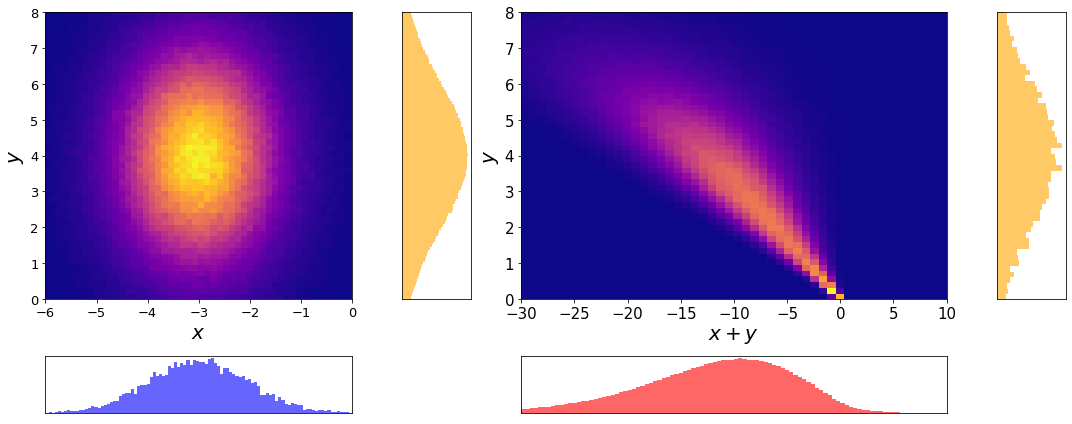

In [4]:
# plot the transformed version of the Gaussian
import matplotlib.gridspec as gridspec

mu_joint = np.array([m1, m2])
Sigma_joint = np.array([[s1**2, 0], [0, s2**2]])
norm_joint_samples = mv_norm.rvs(mu_joint, Sigma_joint, size=num_samples*100)
x_G = norm_joint_samples[:,0]
y_G = norm_joint_samples[:,1]

x_l, x_u = -6, 0
y_l, y_u = 0, 8

norm12_samples_many = norm1_samples_many * norm2_samples_many

x_marginalx = np.linspace(x_l, x_u, 1000+1)
marginalx_pdf = norm.pdf(x_marginalx, m1, s1)

x_marginaly = np.linspace(y_l, y_u, 1000+1)
marginaly_pdf = norm.pdf(x_marginaly, m2, s2)

# plot everything
fig = plt.figure(1, figsize=(15,6))
# set up subplot grid
gridspec.GridSpec(4,9,hspace=10, wspace=10)

# top left: joint Gaussian
plt.subplot2grid((4,9), (0,0), colspan=3, rowspan=3)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=15)
plt.hist2d(x_G, y_G, range=[[x_l, x_u],[y_l, y_u]],bins=[50,50], cmap='plasma', density = True)
plt.xlabel('$x$', size=20)
plt.ylabel('$y$', size=20)

#marginal for x
plt.subplot2grid((4,9), (3,0), colspan=3, rowspan=1)
plt.hist(norm1_samples, range=[x_l, x_u], bins=100, density=True, color='blue', alpha=0.6)
plt.xlim(x_l, x_u)
plt.xticks([])
plt.yticks([])

#marginal for y 
plt.subplot2grid((4,9), (0,3), colspan=1, rowspan=3)
plt.hist(y_G, range=[y_l, y_u], bins=100, density=True, color='orange', alpha=0.6, orientation='horizontal')
plt.ylim(y_l, y_u)
plt.xticks([])
plt.yticks([])

xy_l, xy_u = -30, 10

# middle right: transformed joint Gaussian
plt.subplot2grid((4, 9), (0,4), colspan=4, rowspan=3)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=15)

plt.hist2d(norm12_samples_many, norm2_samples_many, range=[[xy_l, xy_u],[y_l, y_u]],bins=[50,50], cmap='plasma', density = True)
plt.xlabel('$x+y$', size=20)
plt.ylabel('$y$', size=20)

# marginal for x+y
plt.subplot2grid((4, 9), (3,4), colspan=4, rowspan=1)
plt.hist(norm12_samples_many, range=[xy_l, xy_u], bins=num_bins, color='red', alpha=0.6, density=True)
plt.xlim(xy_l, xy_u)
plt.xticks([])
plt.yticks([])

#marginal for y 
plt.subplot2grid((4,9), (0,8), colspan=1, rowspan=3)
plt.hist(norm2_samples, bins=100, density=True, color='orange', alpha=0.6, orientation='horizontal')
plt.ylim(y_l, y_u)
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.savefig('gaussian_joint_product.png')
plt.show();

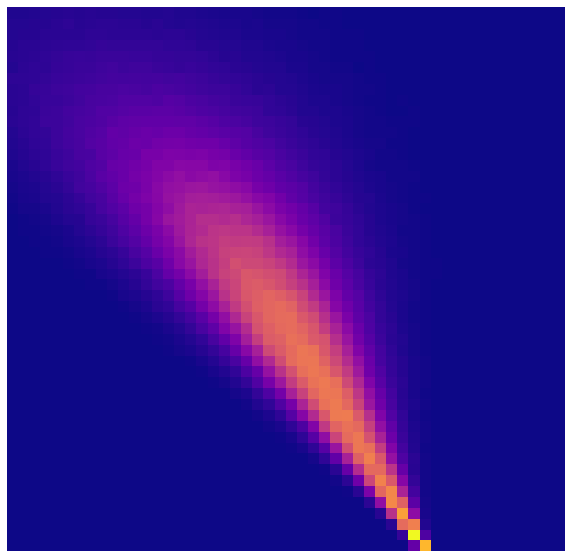

In [5]:
# make header image

plt.figure(figsize=(10,10))
plt.hist2d(norm12_samples_many, norm2_samples_many, range=[[xy_l, xy_u],[y_l, y_u]],bins=[50,50], cmap='plasma', density = True)
plt.axis('off')
plt.savefig('RV_vs_pdf_header.png')
plt.show();